In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from scipy import linalg, stats, special
import copy
import pickle
import random
from random import sample
import math

In [2]:
#Initialise
file1 = open('mean', 'rb')
file2 = open('covariance','rb')
file3 = open('feedback','rb')
og_mean = pickle.load(file1)
og_cov = pickle.load(file2)
feedback = pickle.load(file3)
file1.close()
file2.close()
file3.close()

"""
[0]#predicted label
[1]#iteration
[2]#precision
[3]#accuracy
[4]#recall
[5]#liked
[6]#disliked
[7]#mean
[8]#cov
[9]#data
"""
'''
User
[0]-Iteration
[1]-Precision
[2]-Accuracy
[3]-Recall
[4]-Liked
[5]-Disliked
'''

'\nUser\n[0]-Iteration\n[1]-Precision\n[2]-Accuracy\n[3]-Recall\n[4]-Liked\n[5]-Disliked\n'

In [3]:
def data():
    User=[]
    precision=[]
    recall=[]
    positive=[]
    negative=[]
    for i in range(len(feedback)):
        file= open('User'+str(i), 'rb')
        pred=pickle.load(file)
        file.close()
        pred_label=pred[0] #predicted label
        user=feedback[i]
        tmp=[]
        #Storing the iter value, precision, recall, accuracy, liked and disliked images for plots.
        tmp.append(pred[1])
        tmp.append(pred[2])
        tmp.append(pred[3])
        tmp.append(pred[4])
        tmp.append(len(pred[5]))
        tmp.append(len(pred[6]))
        User.append(tmp)
        del(tmp)
        m_tt=pred[7]
        c_tt=pred[8]
        liked=[]
        disliked=[]
        for k in range(len(m_tt)):
            if pred_label[k]==1:
                for j in range(100):
                    liked.append(np.random.multivariate_normal(m_tt[k],c_tt[k]))
            if pred_label[k]==0:
                for j in range(100):
                    disliked.append(np.random.multivariate_normal(m_tt[k],c_tt[k]))
        tp=0
        fp=0
        tn=0
        fn=0
        for j in range(len(liked)):
            pdf=[]
            for k in range(len(og_mean)):
                pdf.append(sc.stats.multivariate_normal.pdf(liked[j], og_mean[k], og_cov[k]))
            index=np.argmax(pdf)
            if user[index]==1:
                tp=tp+1
            else:
                fp=fp+1
        for j in range(len(disliked)):
            pdf=[]
            for k in range(len(og_mean)):
                pdf.append(sc.stats.multivariate_normal.pdf(disliked[j], og_mean[k], og_cov[k]))
            index=np.argmax(pdf)
            if user[index]==0:
                tn=tn+1
            else:
                fn=fn+1
        tmp=[]
        tmp1=[]
        tmp.append(tp)
        tmp.append(fp)
        tmp1.append(tn)
        tmp1.append(fn)
        positive.append(tmp)
        negative.append(tmp1)
        if tp==0:
            precision.append(0)
            recall.append(0)
        else:
            precision.append(tp/(tp+fp))
            recall.append(tp/(tp+fn))
        del(tmp)
        del(tmp1)
    return User, precision, recall, positive, negative,pred

In [4]:
User, precision, recall, positive, negative,pred=data()

In [5]:
acc=[]
for i in range(50):
    p=positive[i][0]+positive[i][1]
    n=negative[i][0]+negative[i][1]
    acc.append((positive[i][0]+negative[i][0])/(p+n)*100)

In [6]:
print(acc)
print(np.mean(acc))

[66.29411764705883, 68.11111111111111, 47.05555555555556, 68.55555555555556, 68.11111111111111, 51.05555555555556, 69.66666666666667, 85.5, 67.38888888888889, 77.11111111111111, 80.55555555555556, 67.11111111111111, 72.27777777777777, 49.77777777777778, 44.22222222222222, 47.27777777777778, 58.88888888888889, 79.11111111111111, 69.33333333333334, 36.5, 57.94444444444444, 71.83333333333334, 71.41176470588235, 56.44444444444444, 62.44444444444445, 56.333333333333336, 94.44444444444444, 41.5, 59.05555555555555, 27.333333333333332, 42.27777777777778, 57.333333333333336, 42.5, 41.55555555555556, 42.888888888888886, 68.61111111111111, 69.16666666666667, 51.0, 88.5, 44.111111111111114, 44.94444444444444, 41.05555555555556, 58.94444444444444, 86.44444444444444, 59.0, 57.333333333333336, 85.38888888888889, 57.833333333333336, 61.0, 36.666666666666664]
60.18411764705882


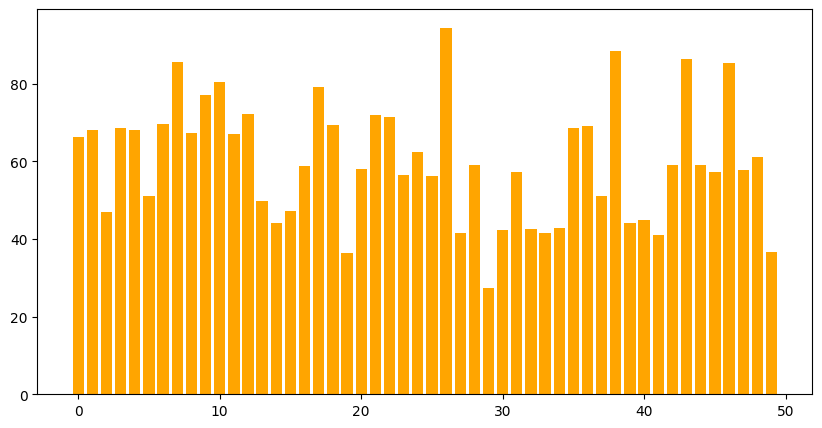

In [22]:
tmp=[]
for i in range(50):
    tmp.append(i)

fig = plt.figure(figsize = (10, 5))
k=np.arange(50)
# creating the bar plot
plt.bar(k, acc, color='orange')
 
#plt.xlabel("Users")
#plt.ylabel("Value")
#plt.title("Accuracy")
plt.show()

In [8]:
print(np.mean(precision))
print(np.mean(recall))

0.3663709554171319
0.3722717033245667


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


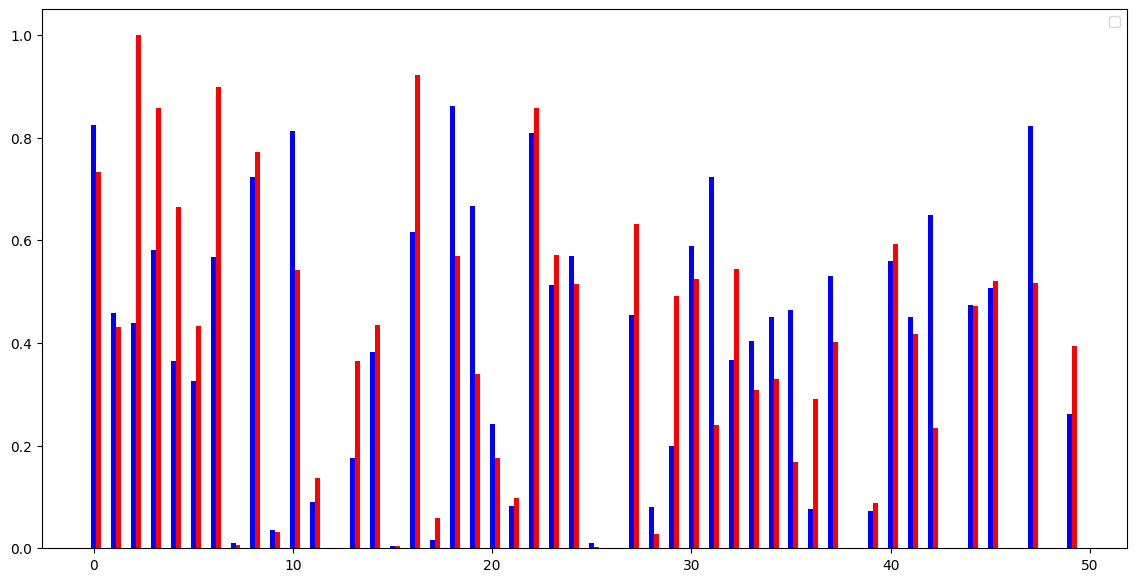

In [23]:
fig = plt.figure(figsize = (14,7))
r=np.arange(50)
width = 0.25
plt.bar(r, precision, color = 'blue',
        width = width)#,label='Precision')
plt.bar(r + width, recall, color = 'red',
        width = width)#,label='Recall')
  
#plt.xlabel("Users")
#plt.ylabel("Value")
#plt.title("Precision and Recall")  
plt.legend()
plt.show()

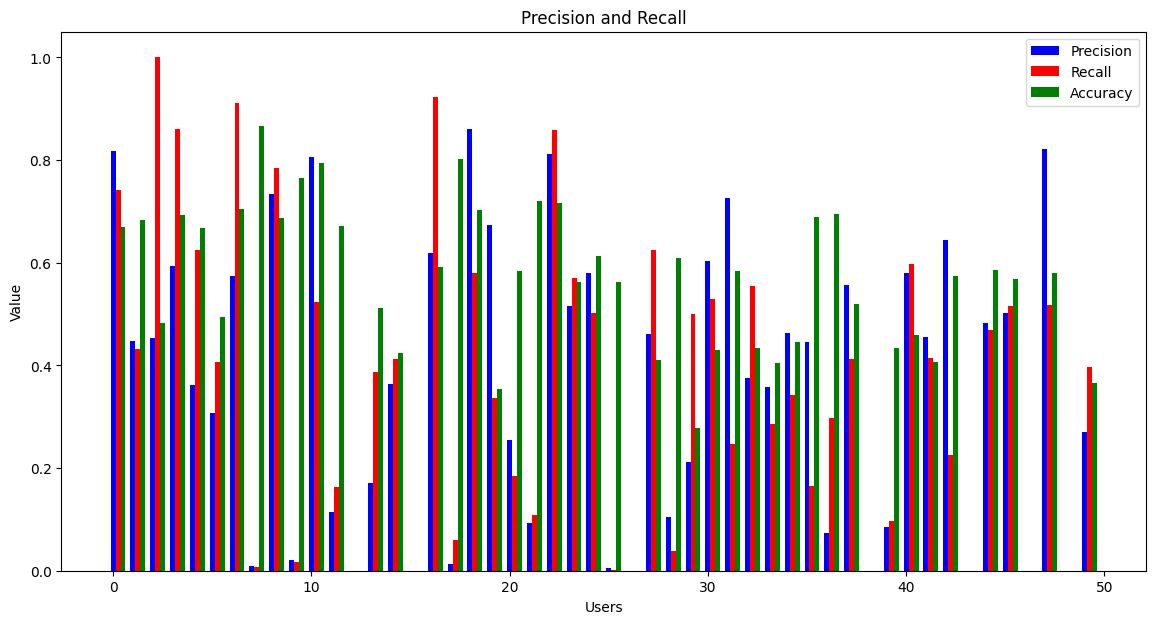

In [10]:
'''
[0]#predicted label
[1]#iteration
[2]#precision
[3]#accuracy
[4]#recall
[5]#liked
[6]#disliked
[7]#mean
[8]#cov
[9]#data
'''

#Trained precision and recall
d=[]
e=[]
f=[]
for i in range(50):
    d.append(User[i][1])
    e.append(User[i][2])
    f.append(User[i][3])



fig = plt.figure(figsize = (14,7))
r=np.arange(50)
width = 0.25
plt.bar(r, d, color = 'blue',
        width = width,label='Precision')
plt.bar(r + width, e, color = 'red',
        width = width,label='Recall')
plt.bar(r + 2*width, f, color = 'green',
        width = width,label='Accuracy')
  
plt.xlabel("Users")
plt.ylabel("Value")
plt.title("Precision and Recall")  
plt.legend()
plt.show()

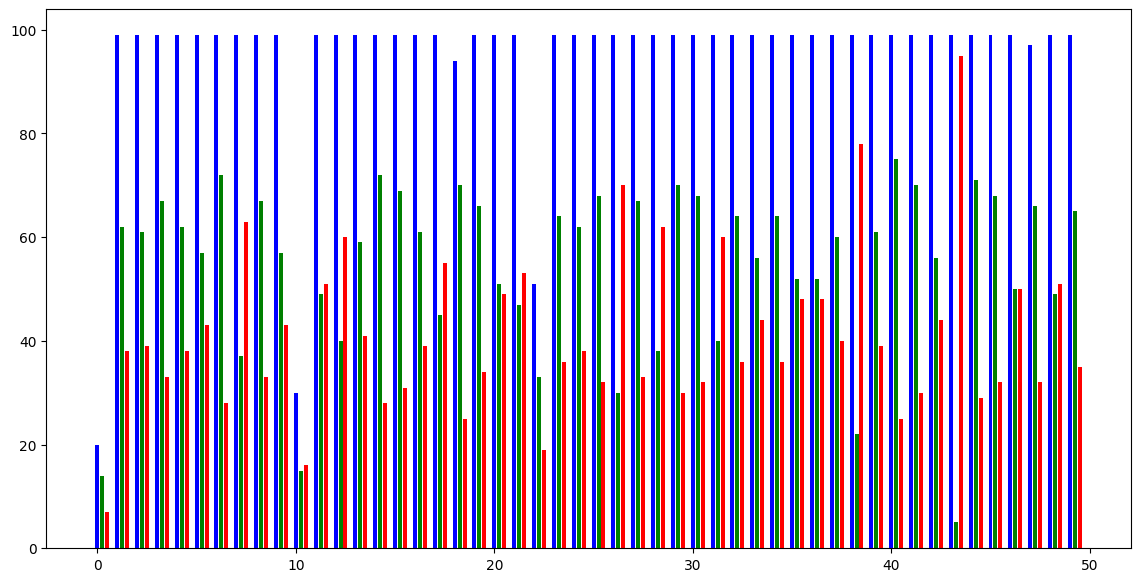

In [21]:
'''
User
[0]-Iteration
[1]-Precision
[2]-Accuracy
[3]-Recall
[4]-Liked
[5]-Disliked
'''
a=[]
b=[]
c=[]

K=0
for i in range(50):
    a.append(User[i][0])
    b.append(User[i][4])
    c.append(User[i][5])
    '''if (User[i][0])<100:
        #K=K+1
        a.append(User[i][0])
        b.append(User[i][4])
        c.append(User[i][5])
    else:
        a.append(0)
        b.append(0)
        c.append(0)
    '''


fig = plt.figure(figsize = (14,7))
r=np.arange(50)
width = 0.25
plt.bar(r, a, color = 'blue',
        width = 0.2)#,label='Iterations')
plt.bar(r + width, b, color = 'green',
        width = 0.2)#,label='Liked Images')
plt.bar(r + 2* width, c, color = 'red',
        width = 0.2)#,label='Disliked Images')
  
#plt.xlabel("Users")
#plt.ylabel("Value")
#plt.title("Iterations vs No. of Liked Images vs No. of Disliked Images",fontdict={'fontsize': 20})  
#plt.legend()
plt.show()

In [12]:
file= open('User'+str(i), 'rb')
pred=pickle.load(file)
file.close()
print(pred[0])
print(pred[7])
print(pred[8])

[1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1.]
[[ 0.03696694 -0.22234593]
 [ 0.82464992  0.56308765]
 [ 1.46388765 -0.82041737]
 [-0.71156753  0.36543668]
 [ 0.17718956  0.831104  ]
 [-0.3588231  -1.7400082 ]
 [-0.90891224 -0.57584189]
 [-0.70272287 -0.06033967]
 [ 0.3218867  -1.53809191]
 [ 0.37366278 -1.68350294]
 [ 0.5278754   0.46871342]
 [ 0.31543571 -1.51282217]
 [ 1.30860706 -0.2050897 ]
 [ 0.17661041  0.76405426]
 [ 0.3719652  -0.54837409]
 [ 0.14167201 -0.82760056]
 [-0.18158098  0.73857399]
 [ 0.6636354  -0.65459285]]
[[[ 5.23092699e-02 -1.37768159e-01]
  [-1.37768159e-01  7.00920776e-01]]

 [[ 3.44870597e-01 -1.28136494e-01]
  [-1.28136494e-01  5.99955315e-01]]

 [[ 1.91266996e-02 -7.59386499e-02]
  [-7.59386499e-02  3.55853922e-01]]

 [[ 1.54484681e-01 -2.86699835e-01]
  [-2.86699835e-01  5.32487887e-01]]

 [[ 1.12279327e-03  1.48415196e-05]
  [ 1.48415196e-05  4.99197830e-05]]

 [[ 2.03280690e-05 -5.12212764e-04]
  [-5.12212764e-04  1.29063962e-02]]

 [[ 6.0355305

In [13]:
for i in range(50):
    if feedback[i][0]==1:
        print(i)

2
4
5
6
9
13
14
15
19
22
30
32
36
42
44
45
48


In [14]:
file= open('User40', 'rb')
pred=pickle.load(file)
file.close()
print(len(pred))

10


In [15]:
len(pred[9])

100

In [16]:
"""
[0]#predicted label
[1]#iteration
[2]#precision
[3]#accuracy
[4]#recall
[5]#liked
[6]#disliked
[7]#mean
[8]#cov
[9]#data
"""
m=pred[7]
c=pred[8]
data=pred[9]
cl=[]
val=[]
for j in range(len(data)):
    pdf=[]
    for k in range(len(m)):
        pdf.append(sc.stats.multivariate_normal.pdf(data[j], m[k], c[k]))
    cl.append(np.argmax(pdf))
for i in range(len(m)):
    tmp=[]
    for j in range(len(cl)):
        if cl[j]==i:
            tmp.append(data[j])
    val.append(tmp)
print(len(val))

18


In [17]:
pred[0]

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1.])

In [18]:
red=["red","firebrick","maroon","salmon","orangered","darkorange","orange","indianred","red","tomato","mistyrose","darksalmon"]
green=["olive","yellowgreen","teal","greenyellow","chartreuse","lightgreen","limegreen","green","mediumseagreen","springgreen","lime","forestgreen","seagreen"]

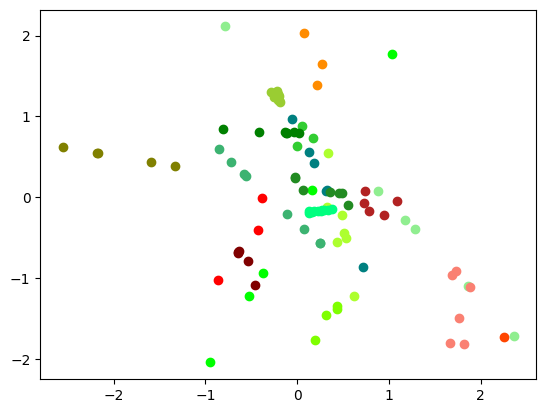

In [19]:
k=0
l=0
for i in range(len(val)):
    tmp=np.array(val[i])
    if pred[0][i]==1:
        plt.scatter(tmp[:,0],tmp[:,1],color=green[k])
        k=k+1
    if pred[0][i]==0:
        plt.scatter(tmp[:,0],tmp[:,1],color=red[l])
        l=l+1
plt.show()

In [20]:
for i in feedback:
    print(i)

[0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.]
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1.]
[1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.]
[0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1.]
[1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]
[1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
[1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
[1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.]
[1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.]
[0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.